<a href="https://colab.research.google.com/github/SaAPro/fraud_detection_ieee_cis_kaggle_dataset/blob/master/fraud_detection_ieee_cis_kaggle_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
root_path = 'gdrive/Users/alexandre_sa/Desktop/'
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

In [0]:
!kaggle competitions download -c ieee-fraud-detection

In [0]:
!unzip test_identity.csv.zip 
!unzip test_transaction.csv.zip 
!unzip train_identity.csv.zip
!unzip train_transaction.csv.zip

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set(style="ticks", color_codes=True)

In [3]:
df_id = pd.read_csv("train_identity.csv")
df_tran = pd.read_csv("train_transaction.csv")

print('Dimension of df_id', df_id.shape)
print('Dimension of df_tran', df_tran.shape)

Dimension of df_id (144233, 41)
Dimension of df_tran (590540, 394)


In [4]:
df = pd.merge(df_tran, df_id, on='TransactionID', how='left')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
columns_to_encode = [ col  for col, dt in df.dtypes.items() if dt == object]
print(columns_to_encode)

df = df.apply(pd.to_numeric, errors='coerce')

le = preprocessing.LabelEncoder()
for columns in columns_to_encode:
  df[columns] = le.fit_transform(df[columns])
df.head()


['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,0,13926,NaN,150.0,0,142.0,0,315.0,87.0,19.0,NaN,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,0,0,0,NaN,0,0,0,0,0,0,0,2
1,2987001,0,86401,29.0,393686,2755,404.0,150.0,393686,102.0,393686,325.0,87.0,NaN,NaN,393686,393686,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393686,NaN,NaN,393686,393686,NaN,NaN,NaN,NaN,NaN,NaN,393686,NaN,NaN,NaN,393686,393686,393686,393686,393686,NaN,393686,393686,393686,393686,393686,393686,393686,393687
2,2987002,0,86469,59.0,393687,4663,490.0,150.0,393687,166.0,393687,330.0,87.0,287.0,NaN,393687,393687,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393687,NaN,NaN,393687,393687,NaN,NaN,NaN,NaN,NaN,NaN,393687,NaN,NaN,NaN,393687,393687,393687,393687,393687,NaN,393687,393687,393687,393687,393687,393687,393687,393688
3,2987003,0,86499,50.0,393688,18132,567.0,150.0,393688,117.0,393688,476.0,87.0,NaN,NaN,393688,393688,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393688,NaN,NaN,393688,393688,NaN,NaN,NaN,NaN,NaN,NaN,393688,NaN,NaN,NaN,393688,393688,393688,393688,393688,NaN,393688,393688,393688,393688,393688,393688,393688,393689
4,2987004,0,86506,50.0,393689,4497,514.0,150.0,393689,102.0,393689,420.0,87.0,NaN,NaN,393689,393689,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,393689,NaN,-480.0,393689,393689,166.0,NaN,542.0,144.0,NaN,NaN,393689,NaN,NaN,NaN,393689,393689,393689,393689,393689,32.0,393689,393689,393689,393689,393689,393689,393689,393690


In [6]:
null_cols = [col for col in df.columns if df[col].isnull().sum() / df.shape[0] > .7]
print('Colums to drop: ', null_cols)
df = df.drop(null_cols, 1)
df.fillna(value=-99999, inplace=True)
df.head()

Colums to drop:  ['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,...,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,0,13926,-99999.0,150.0,0,142.0,0,315.0,87.0,19.0,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-99999.0,13.0,-99999.0,-99999.0,13.0,13.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2987001,0,86401,29.0,393686,2755,404.0,150.0,393686,102.0,393686,325.0,87.0,-99999.0,393686,393686,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-99999.0,-99999.0,0.0,-99999.0,0.0,-99999.0,0.0,393686,393686,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393686,393687
2,2987002,0,86469,59.0,393687,4663,490.0,150.0,393687,166.0,393687,330.0,87.0,287.0,393687,393687,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-99999.0,-99999.0,0.0,-99999.0,0.0,315.0,315.0,393687,393687,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393687,393688
3,2987003,0,86499,50.0,393688,18132,567.0,150.0,393688,117.0,393688,476.0,87.0,-99999.0,393688,393688,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,-99999.0,111.0,393688,393688,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393688,393689
4,2987004,0,86506,50.0,393689,4497,514.0,150.0,393689,102.0,393689,420.0,87.0,-99999.0,393689,393689,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,393689,393689,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393689,393690


In [7]:
fraud = df.loc[df['isFraud'] == 1]
not_fraud = df.loc[df['isFraud'] == 0]
print('Number of fraudulent operations = %i over %i operations' % (len(fraud), len(df)))

Number of fraudulent operations = 20663 over 590540 operations


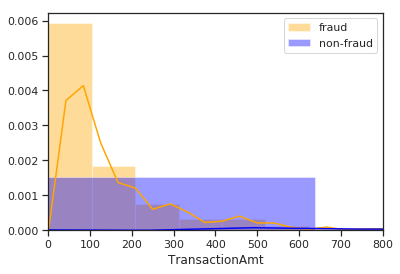

In [8]:
ax = sns.distplot(fraud['TransactionAmt'], color='Orange', label='fraud')
sns.distplot(not_fraud['TransactionAmt'], color='Blue', label='non-fraud', ax=ax)
plt.xlim(0,800)
plt.legend()
plt.show()

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
x = df.drop(['isFraud', 'TransactionID', 'TransactionDT'], 1)
y = df['isFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .35)

In [12]:
logistic = linear_model.LogisticRegression(C=1e-3, solver='saga')
logistic.fit(x_train, y_train)
print('Score: ', logistic.score(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Score:  0.9645699577626289
